#Dataset Overview

The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

**Key Features of the Dataset:**

Comprehensive Sleep Metrics: Explore sleep duration, quality, and factors influencing sleep patterns.
Lifestyle Factors: Analyze physical activity levels, stress levels, and BMI categories.
Cardiovascular Health: Examine blood pressure and heart rate measurements.
Sleep Disorder Analysis: Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.

**Dataset**

1. Person ID: An identifier for each individual.
2. Gender: The gender of the person (Male/Female).
3. Age: The age of the person in years.
4. Occupation: The occupation or profession of the person.
5. Sleep Duration (hours): The number of hours the person sleeps per day.
6. Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
7. Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
8. Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
9. BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
10. Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
11. Heart Rate (bpm): The resting heart rate of the person in beats per minute.
12. Daily Steps: The number of steps the person takes per day.
Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

**Details about Sleep Disorder Column:**
* None: The individual does not exhibit any specific sleep disorder.
* Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
* Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.


#Load data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

In [3]:
raw_data = pd.read_csv("/content/drive/MyDrive/GIthub Datasets/Sleep_health_and_lifestyle_dataset.csv",sep=",")

In [4]:
raw_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## manage null values if any

In [5]:
data = raw_data.drop(columns='Person ID',axis=1)
data.isna().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

## correlation matrix

<Axes: >

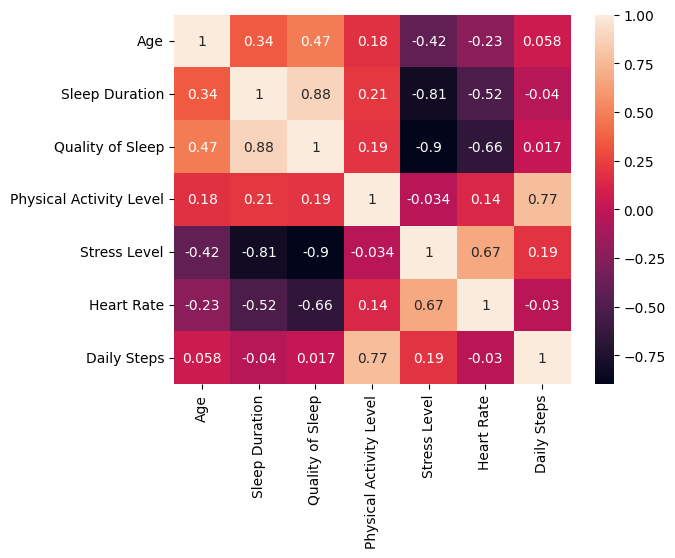

In [6]:
sns.heatmap(data.corr(),annot=True)

## Analysis of categorical features

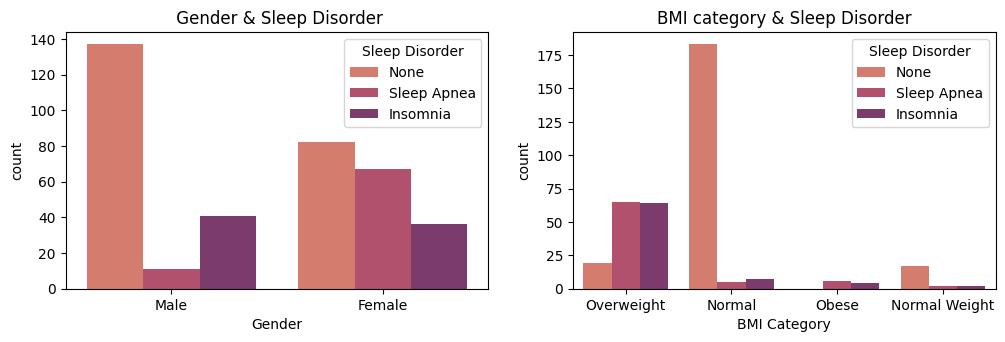

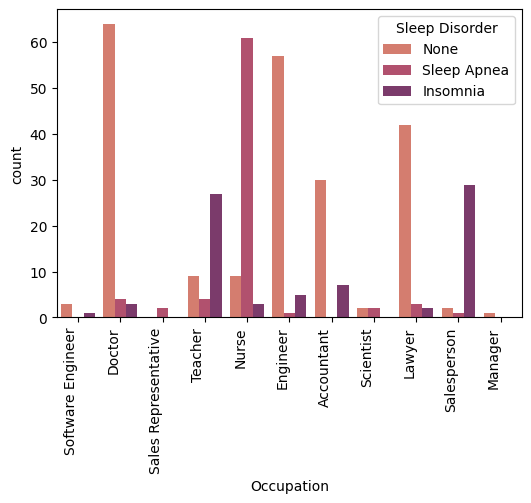

In [7]:
from seaborn._core.properties import HorizontalAlignment
plt.figure(figsize = (12,8))
plt.subplots_adjust(hspace=0.4)
plt.subplot(2,2,1)
plt.gca().set_title(" Gender & Sleep Disorder")
sns.countplot(x='Gender', palette='flare' , data=data, hue= 'Sleep Disorder')

plt.subplot(2,2,2)
plt.gca().set_title("BMI category & Sleep Disorder")
sns.countplot(x = 'BMI Category', palette='flare',data=data, hue= 'Sleep Disorder');
plt.show()

plt.figure(figsize=(6,4))
pic= sns.countplot(x='Occupation', palette='flare', data=data, hue='Sleep Disorder')
pic.set_xticklabels(pic.get_xticklabels(),rotation=90,horizontalalignment='right')
#plt.autofmt()
plt.show()

**-->** In Females, Probability of suffering from sleep apnea is higher than Insomnia whereas In Males, Probability of suffering from Sleep Apnea is lower than Insomnia.

**-->** Overweight and obese people are highly likely to suffer from Sleep disorder.

**-->** SalesPerson and Teachers are higly likely to suffer from Insomnia and Nurses are mostly have Sleep Apnea.

## Analysis of numerical features (remove outliers if any)


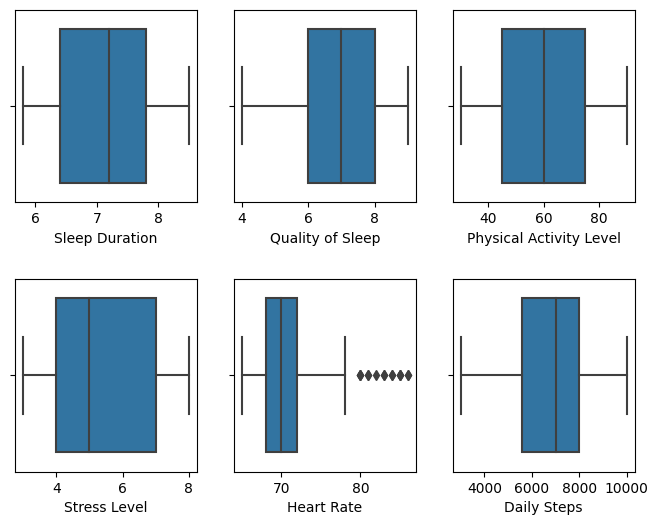

In [8]:
plt.figure(figsize=(8,6))
#plt.tight_layout(pad=5.0)
plt.subplots_adjust(hspace=0.4)

plt.title("Look for outliers")

plt.subplot(2,3,1)
#plt.gca().set_title("Age Boxplot")
sns.boxplot( x="Sleep Duration",data=data)

plt.subplot(2,3,2)
#plt.gca().set_title("Age Boxplot")
sns.boxplot( x="Quality of Sleep",data=data)

plt.subplot(2,3,3)
#plt.gca().set_title("Age Boxplot")
sns.boxplot( x="Physical Activity Level",data=data)

plt.subplot(2,3,4)
#plt.gca().set_title("Age Boxplot")
sns.boxplot( x="Stress Level",data=data)

plt.subplot(2,3,5)
#plt.gca().set_title("Age Boxplot")
sns.boxplot( x="Heart Rate",data=data)

plt.subplot(2,3,6)
#plt.gca().set_title("Age Boxplot")
sns.boxplot( x="Daily Steps",data=data );

In [9]:
data['Heart Rate'].value_counts()

68    94
70    76
72    69
65    67
75    36
78     5
85     3
80     3
84     2
83     2
73     2
67     2
74     2
77     2
81     2
76     2
69     2
86     2
82     1
Name: Heart Rate, dtype: int64

**-->** we can clearly say, Heart Rate doesn't have actual outliers.Because of lower amount of data these values are not repeated and looks like outlier in the graph.

# Data modeling

Separate features and target variable.
Here target is categorical,hence we'll apply classification models.



In [10]:
X = data.drop(columns='Sleep Disorder',axis=1)
y = data['Sleep Disorder']

print(X.shape,y.shape)

(374, 11) (374,)


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 32.3+ KB


Import modeling libraries

In [26]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier, RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## Encode Categorical features

In [13]:
cat_feat = ['Gender','Occupation','BMI Category','Blood Pressure']
le = LabelEncoder()

for i in cat_feat:
  X[i] = le.fit_transform(X[i])

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int64  
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    int64  
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int64  
 8   Blood Pressure           374 non-null    int64  
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 32.3 KB


In [14]:
X.describe()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,0.505348,42.184492,3.772727,7.132086,7.312834,59.171123,5.385027,1.296791,13.114973,70.165775,6816.844920
std,0.500641,8.673133,3.056081,0.795657,1.196956,20.830804,1.774526,1.431226,7.100590,4.135676,1617.915679
min,0.000000,27.000000,0.000000,5.800000,4.000000,30.000000,3.000000,0.000000,0.000000,65.000000,3000.000000
25%,0.000000,35.250000,1.000000,6.400000,6.000000,45.000000,4.000000,0.000000,9.000000,68.000000,5600.000000
50%,1.000000,43.000000,3.000000,7.200000,7.000000,60.000000,5.000000,0.000000,15.000000,70.000000,7000.000000
75%,1.000000,50.000000,5.000000,7.800000,8.000000,75.000000,7.000000,3.000000,20.000000,72.000000,8000.000000
max,1.000000,59.000000,10.000000,8.500000,9.000000,90.000000,8.000000,3.000000,24.000000,86.000000,10000.000000


<Axes: >

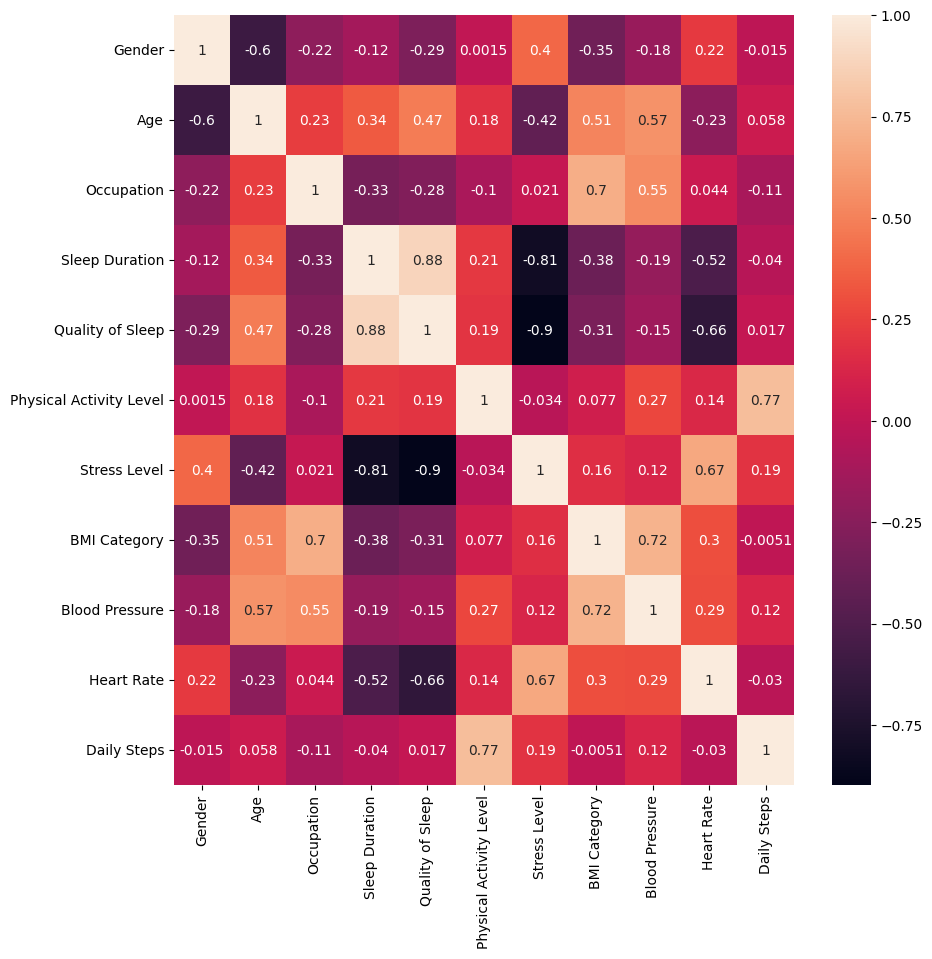

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(),annot=True)

From above correlation matrix ,

**-->** (Sleep duration,Quality of sleep),(Occupation,BMI Category),(Stress level, Heart Rate) are positively related.

**-->** (Sleep duration, Stress level),(Quality of Sleep, Stress level) are negatively related.

Both the points are self explanatory.

## TrainTestSplit
Split data into training data and validation data. Let's keep 20% data for validation and use rest for training the model.




In [15]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

## Make Pipeline
Standardise every features so that it's value doesn't affect the model. In easy words making std of each feature around 1 and mean 0.

In [16]:
#Create pipeline to standardise the value and apply the model.
pipe = Pipeline([
                ('scaler',StandardScaler()),
                 ('model',LogisticRegression())
                 ])

In [17]:
#parameter grid for each model.

params = [
      {   'model': [LogisticRegression()],
          'model__penalty': ['l1','l2','elasticnet'],
          'model__tol': (0.1,0.01,0.001),
          'model__solver': ['lbfgs','liblinear','sag','saga'],
          'model__C': [ 0.01,0.1,1,10],
          'model__max_iter': [100,200,500,1000]
      },

           {'model':[SGDClassifier()],
             'model__loss':['hinge','log_loss','perceptron','squared_hinge'],
             'model__penalty':['l1','l2','elasticnet'],
             'model__alpha': (0.1,0.01,0.001,0.0001)  },

           {'model':[SVC()],
            'model__C':(0.1,10,20),
            'model__kernel':['linear','poly','rbf'],
            'model__degree':range(2,5)},

           {'model':[RandomForestClassifier()],
            'model__n_estimators':(10,20,40),
            'model__max_depth': range(4,7),
            'model__min_samples_split': range(4,7)},

           {'model':[GradientBoostingClassifier()],
            'model__n_estimators':(10,20,40),
            'model__subsample':(0.5,0.8),
            'model__min_samples_split': range(2,4)}

            ]

In [18]:
#using GridSearchCV to find best parameters of each model

grid =GridSearchCV(pipe, params, cv=7)
estimator = grid.fit(X_train,y_train)


In [19]:
#Best estimator model
model = estimator.best_estimator_
model

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=6, min_samples_split=5,
                                        n_estimators=20))])

In [20]:
#fitting model to our training data

model.fit(X_train,y_train)
model.score(X_val,y_val)

0.88

**Classification report**

In [27]:
print(classification_report(y_val,model.predict(X_val)))

              precision    recall  f1-score   support

    Insomnia       0.72      0.81      0.76        16
        None       0.95      0.98      0.97        43
 Sleep Apnea       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75



In [28]:
y.value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

**-->** Our data doesn't have more 'Sleep Apnea' and 'Insomnia' examples. This can be reason for not being predicted with good precision.

Finding important features of the best model.

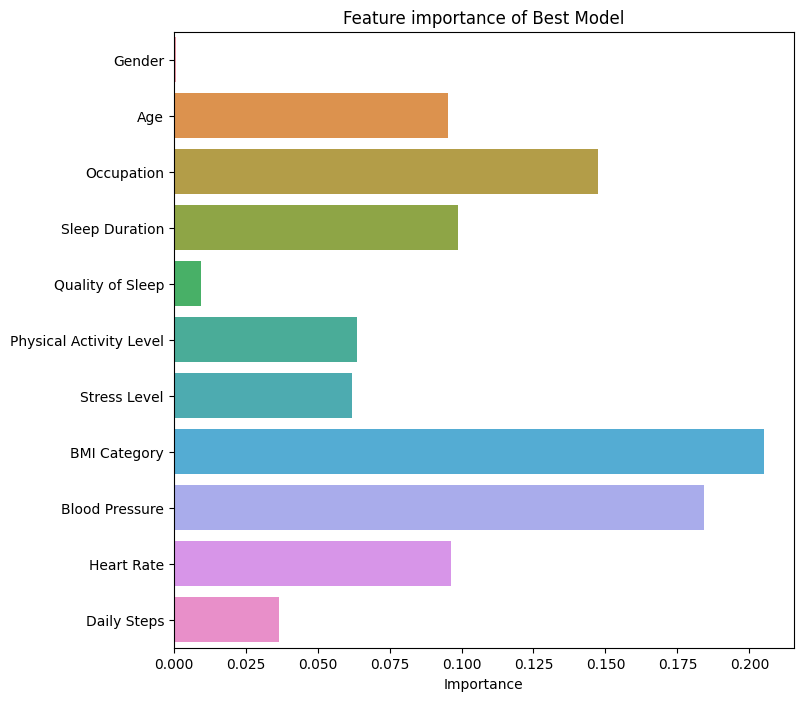

In [21]:
importance = model.named_steps['model'].feature_importances_
features = X.columns

plt.figure(figsize=(8,8))
plt.gca().set_title("Feature importance of Best Model")
plt.gca().set_xlabel("Importance")
sns.barplot(y= features , x=importance,orient ='h');

BMI Category , Blood Pressure, Occupation are 3 important features in RandomForestClassifier model.